# Code snipets for MSP

In [66]:
import pandas as pd
import numpy as np
import sympy as sp
from scipy.stats import pearsonr

import matplotlib.pyplot as plt


from tqdm.auto import tqdm
from IPython.display import display

## Kapitel 1 - Eigenvektoren

Eigenwert / Eigenvektor ausgeben   

In [67]:
M1 = np.array([[1,0,0],[-5,0,2],[0,0,1]])        # Matrix anpassen!!!

ew, ev = np.linalg.eig( M1 )

# np.round( ew, 10 )                               # wenn EW komplex sind bereinigen

ew, ev

# EW als Liste ausgeben
# list(ew)

(array([0., 1., 1.]),
 array([[ 0.        ,  0.19611614,  0.        ],
        [ 1.        , -0.98058068,  0.89442719],
        [ 0.        ,  0.        ,  0.4472136 ]]))

Eigenvektor normalisieren

In [68]:
for k in range( M1.shape[0] ):
    display( sp.Matrix( np.round( ev[:,k], 4 ) ) ) 

## lamda 0 => m=d=1 , lamda 1 => m=d=2

Matrix([
[0.0],
[1.0],
[0.0]])

Matrix([
[ 0.1961],
[-0.9806],
[    0.0]])

Matrix([
[   0.0],
[0.8944],
[0.4472]])

Gegeben Matrix A. 

a) EW, EV beechnen


b) zeigen, dass EV orthogonal sind und wiso


c) Matrix V berechnen aus EV


d) A^20 berechnen 

In [69]:
# Matrix einlesen
A = np.array([[89,75,22,102],[75,116,27,120],[22,27,33,62],[102,120,62,200]], dtype=float)


# EW, EV berechnen
ew, ev = np.linalg.eig(A)


# zeigen, EV orthogonal
np.round( np.dot( ev.T, ev ), 10 )


# zeigt auch, dass EV orthogonal, einfach mit for loop...
# S = np.zeros([ev.shape[1], ev.shape[1]])

# for i in range(ev.shape[1]):
#     for j in range(ev.shape[1]):
#         S[i,j] = np.vdot( ev[:,i], ev[:,j])

# np.round( S, 10 )


# Matrix V und D berechnen
V = ev
Vinv = np.linalg.inv(V)
D = np.round( Vinv.dot(A).dot(V), 10 )
D


# A^20 berechnen
Vinv = np.linalg.inv(A)
A_20 = Vinv @ D ** 20 @ V


sp.Matrix(A_20)


Matrix([
[-2.15867418572374e+49, -2.15483574926554e+49,  3.87901894685989e+49, -1.17690179653957e+49],
[ 3.95564967854609e+48,  3.94861595847734e+48, -7.10808520882741e+48,  2.15660670051569e+48],
[-1.21420050758675e+49, -1.21204148260433e+49,  2.18185162233586e+49, -6.61977971566376e+48],
[ 1.23998701135823e+49,  1.23778213422413e+49, -2.22818855329301e+49,  6.76036685389816e+48]])

Begründung, wiso EV orthogonal:

Die Skalarprodukte der Eigenvektoren $\mathbf{v}_i$ und $\mathbf{v}_j$ sind gleich null für alle $i\neq j$ und damit stehen alle Eigenvektoren orthogonal zueinander. Die Eigenvektoren stehen orthogonal zueinander, weil die Matrix $A$ symmetrisch ist.

## Kapitel 3 - Kovarianz in Daten

gegeben x,y,z

a) C, R berechnen / welche Variablen korellieren? /  visualisieren

b) ew, ev von C / V bestimmen / zeigen dass V C diagonalisiert

c) zeigen, dass V orthogonal

In [70]:
# Daten einlesen
x = np.array([0.85,0.18,0.05,0.36,0.28,0.53,0.31,0.30,0.11,0.25])
y = np.array([-1.90,0.00,0.59,-0.31,-1.12,-0.46,-0.78,1.00,0.46,-0.49])
z = np.array([0.85,0.15,0.05,0.33,0.29,0.47,0.27,0.34,0.15,0.29])
X = np.vstack([x,y,z]).T
# sp.Matrix( X )

a)


Alle Variablen korrelieren relativ stark miteinander, $x$ und $z$ dabei sehr stark positiv (0.99) und $x$ und $y$ bzw. $y$ und $z$ etwas schwächer negativ (-0.73 bzw. -0.71). Unterstützung mit Visualisierung:

Text(0, 0.5, 'z')

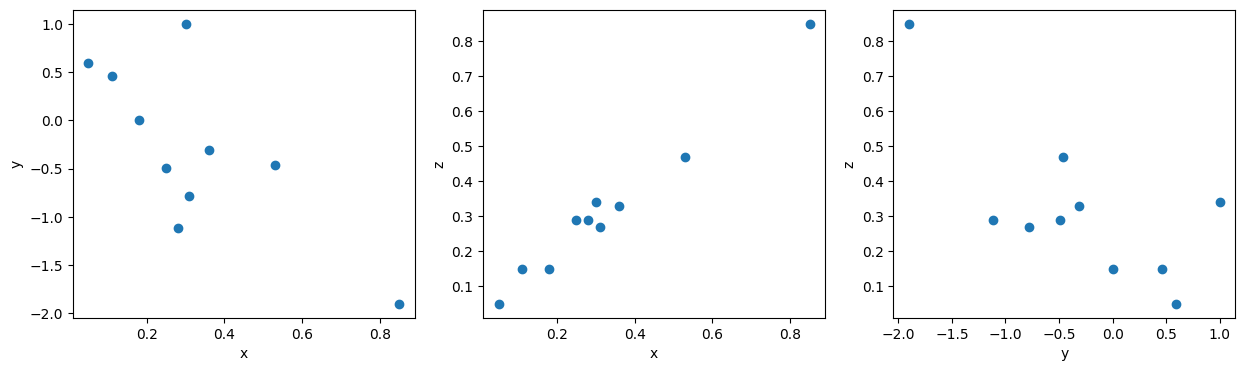

In [71]:
# a)
# Kovar
X0 = X - np.mean(X, axis=0)
C = 1/(X0.shape[0]-1) * X0.T @ X0
# sp.Matrix( np.round(C, 4) )

# Korrel
Xs = (X - np.mean(X, axis=0))/np.std(X, axis=0, ddof=1)
R = 1/(Xs.shape[0]-1) * Xs.T @ Xs
# sp.Matrix( np.round(R, 4) )

# visualisieren
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,2])
plt.xlabel("x")
plt.ylabel("z")
plt.subplot(1,3,3)
plt.scatter(X[:,1], X[:,2])
plt.xlabel("y")
plt.ylabel("z")

b)

In [72]:
# EW berechnen
ew, ev = np.linalg.eig( C )
sort_order = np.flip( np.argsort( ew ) )
ew = ew[sort_order]
ev = ev[:,sort_order]

# sp.Matrix( np.round(ev,4) )

# V berechnen und diagonalisieren
V = ev
sp.Matrix( np.round( V.T @ C @ V, 4 ) )

#Varianzanteil berechnen
np.round( ew/np.sum(ew), 3 ) # zahl die am nächsten bei 1 ist erklärt die  varianz am besten

array([0.946, 0.053, 0.001])

c)

In [73]:
# wenn V.T@V=I, dann orthogonal
np.round( V.T @ V, 10 )

# det(V) muss +1/-1 sein
np.linalg.det(V)

np.float64(1.0)

## PCA

Daten einlesen

In [74]:
X1 = np.array([[0.51, 0.87],[0.77, 0.11],[0.87, 0.3 ],[0.01, 0.47],[0.31, 0.67],[0.96, 0.26],[0.51, 0.7 ],
               [0.32, 0.66],[0.54, 0.18],[0.22, 0.32],[0.81, 0.89],[0.34, 0.08],[0.54, 0.75],[0.01, 0.06],
               [0.67, 0.73],[0.21, 0.74],[0.93, 0.41],[0.37, 0.99],[0.75, 0.45],[0.76, 0.19]])

X2 = np.array([[0.51, -1.08],[0.77, -2.01],[0.87, -2.03],[0.01, 0.19],[0.31, -0.37],[0.96, -1.6],
               [0.51, -1.16],[0.32, -0.89],[0.54, -0.85],[0.22, -0.22],[0.81, -1.61],[0.34, -0.68],
               [0.54, -1.42],[0.01, -0.07],[0.67, -1.01],[0.21, -0.65],[0.93, -1.98],[0.37, -0.78],
               [0.75, -1.58],[0.76, -1.97]])

X3 = np.array([[0.08,  0.1],[0.78, 0.78],[0.44, 0.45],[0.72, 0.66],[0.98, 1.05],[0.54, 0.55],[0.5, 0.48],
               [0.07, 0.15],[0.27, 0.27],[0.5, 0.44],[0.68, 0.66],[0.8, 0.71],[0.38, 0.42],[0.07, 0.05],
               [0.29, 0.26],[0.91, 0.95],[0.21, 0.14],[0.45, 0.47],[0.93, 0.85],[0.02, -0.01]]
)
X1.shape, X2.shape, X3.shape

((20, 2), (20, 2), (20, 2))

### Kovarianzmatrix berechnen

- Auf der Diagonale: Varianzen der einzelnen Variablen
- Nicht standardisiert, abhängig von der Skala der Variablen
- Misst die Richtung der linearen Beziehung zwischen Variablen

In [75]:
def calc_cov(X):

    mean_X = np.mean(X, axis=0)

    X_ = (X-mean_X)
    C = (1/(len(X)-1)) * X_.T @ X_

    print(f"Kovarianzmatrix:\n{C} \n")

    return C


#calc covariance matrix
C1 = calc_cov(X1)

Kovarianzmatrix:
[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]] 



### Korrelationsmatrix berechnen

- Auf der Diagonale: Immer 1, da jede Variable perfekt mit sich selbst korreliert
- Standardisiert, Werte zwischen -1 und +11
- Misst sowohl die Stärke als auch die Richtung der linearen Beziehung
- Pearson-Korrelation bei den nicht einsen 

In [76]:
# X= Ursprüngliche Matrix, nicht Kovarianz Matrix!!
def calc_cor(X):

    C = calc_cov(X)
    
    # Berechne die Standardabweichungen aus der Diagonale der Kovarianzmatrix
    std = np.sqrt(np.diag(C))
    
    # Berechne die Korrelationsmatrix
    R = C / np.outer(std, std)


    print(f"Korrelationsmatrix:\n{R} \n") 

    return R


# R berechnen
R1 = calc_cor(X1)

Kovarianzmatrix:
[[ 0.08474184 -0.00534816]
 [-0.00534816  0.08722395]] 

Korrelationsmatrix:
[[ 1.         -0.06220673]
 [-0.06220673  1.        ]] 



### Eigenwerte / Eigenvektoren berechnen und sortieren

In [77]:
def calc_sorted_eig( M ):
    
    ew, ev = np.linalg.eig(M)

    # Sortiere Indizes basierend auf den Eigenwerten in absteigender Reihenfolge
    idx = ew.argsort()[::-1]
    
    # Sortiere Eigenwerte und Eigenvektoren
    ew_sorted = ew[idx]
    ev_sorted = ev[:, idx]
    
    return ew_sorted, ev_sorted


# EW / EV berechnen
ew1, ev1 = calc_sorted_eig(C1)
# ew2, ev2 = calc_sorted_eig(C2)
# ew3, ev3 = calc_sorted_eig(C3)
ew1,ev1

(array([0.09147316, 0.08049263]),
 array([[ 0.62207473, -0.78295787],
        [-0.78295787, -0.62207473]]))

### Kovarianzmatrizen diagonalisieren

In [78]:
#calculate the diagonalised covariance matrix
def diag_cov_matrix(ew):
    D = np.diag(ew)
    D = np.round(D, 4)
    print(f"Diagonalised covariance matrix zu: \n{D}\n")
    return D


C1_diag = diag_cov_matrix(ew1)

Diagonalised covariance matrix zu: 
[[0.0915 0.    ]
 [0.     0.0805]]



### Varianzanteile berechnen

α1 = λ1/(λ1+λ2)

α2 = λ2/(λ1+λ2)

α1+α2= 100%

In [79]:
# calculate the alpha 1+2 and check if they add up to 100% aka 1
def varianzanteile(eigenvalues):
    total_var = np.sum(eigenvalues)
    var_anteile = eigenvalues / total_var * 100

    alpha_1 = round(var_anteile[0,0], 1) #auf die erste Dezimalstelle gerundet
    alpha_2 = round(var_anteile[1,1], 1) #auf die erste Dezimalstelle gerundet
    sum_a1_a2 = alpha_1 + alpha_2

    is_valid = True if (sum_a1_a2 == 100) else False

    print(f"The variance ist {is_valid} \n Alpha1: {alpha_1}% \n Alpha2: {alpha_2}% \n Check: {sum_a1_a2}%")
    return alpha_1, alpha_2

 
C1_var = varianzanteile(C1_diag)

The variance ist True 
 Alpha1: 53.2% 
 Alpha2: 46.8% 
 Check: 100.0%


0.875503767612632 0.0039110223371686785


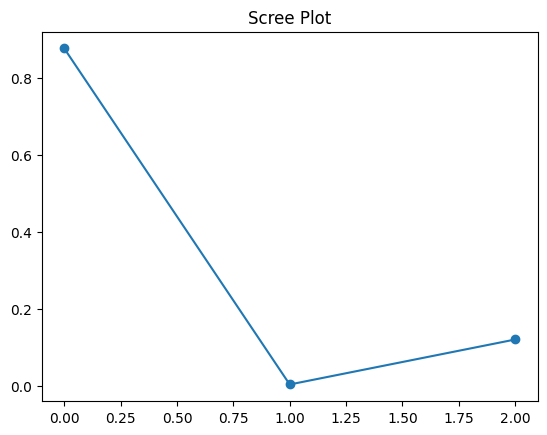

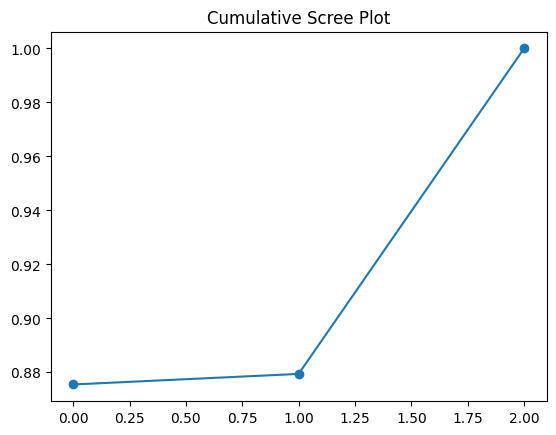

array([[-4.01676393, -0.07584785,  0.21128902]])

In [80]:
def sorted_eig(M):
    eigenvalues, eigenvectors = np.linalg.eig(M)
    return eigenvalues, eigenvectors

def simplePCA(A):
    arrayList = []
    sdList = []
    #Getting mean and standard deviance for normalizing data
    for i in range(0, len(A[0])):
        arrayList.append(np.mean(A[:, i]))
        sdList.append(np.std(A[:, i]))

    #normalized data
    S = (A - np.array(arrayList)) / np.array(sdList)

    #calculate correlation matrix (if not normalized this formula can be used to get the Covariance matrix)
    corr = (np.transpose(S) @ S) / (S.shape[0]-1)

    #get eigenvectors from corr
    ew, ev = sorted_eig(corr)
    V = sorted_eig(corr)[1]

    listOfOdds = []
    for i in range(0, len(A[0])):
        listOfOdds.append((ew[i] / sum(ew)))

    #this is the actual PCA in the end
    W = S @ V

    #"Gesamtvarianz"
    chance1l1, chance1l2 = ew[0] / sum(ew), ew[1] / sum(ew)
    print(chance1l1, chance1l2)

    #Scree Plots to visualize loss
    cumListOfOdds = np.cumsum(listOfOdds)
    plt.plot(np.arange(0, len(A[0])), listOfOdds)
    plt.scatter(np.arange(0, len(A[0])), listOfOdds)
    plt.title("Scree Plot")
    plt.show()

    plt.plot(np.arange(0, len(A[0])), cumListOfOdds)
    plt.scatter(np.arange(0, len(A[0])), cumListOfOdds)
    plt.title("Cumulative Scree Plot")
    plt.show()

    return W


W = simplePCA(X)

data = W[:1]
data


## Kapitel 4 - Vektorräume


Spaltenvektoren Bild / Kern:

Vektor

In [81]:
A = sp.Matrix([[1,0,1]])
print(A)


#Spaltenvektoren Bild
A.T.rref( pivots=False ).T

# es bleibt Spaltenvektor "1" übrig, also ist die Matrix linear abhängig. 
# das Bild ist also R

#Kern
sp.linsolve( A )
#der zweite wert ist der Parameter und ist frei wählbar

Matrix([[1, 0, 1]])


{(1, tau0)}

Spaltenvektoren Bild / Kern:

Matrix

In [82]:
B = sp.Matrix([[1, 3, 2],[2, 4, 4],[3, 5, 6]])


#Spaltenvektoren Bild
B.T.rref( pivots=False ).T

# Kern:
sp.linsolve( (B, sp.zeros(3)) )

{(-2*tau0, 0, tau0)}

## Kapitel 5 - Quad. Form / positive Definitheit


wenn Quadriken gewünscht, dann unter "le2_lineare_regression/le2_quadrikenqfgeometry.ipynb" nachschauen


Prüfen ob eine Matrix positiv definit ist

In [83]:
def positiv_definit(A):
    ew = np.linalg.eigvals(A)
    return np.all(ew>0)

In [84]:
A = np.array([[1,2],[2,1]])
positiv_definit(A)

# wenn np.True_  =>  dann ist die Matrix positiv definit
# wenn np.False_ => dann ist die Matrix nicht positiv definit

np.False_

## Lineare Regression

### Normalengleichung

wir haben folgende Matrizen

$$
X = \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix}, \quad
\mathbf{y} = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}, \quad
\hat{\mathbf{y}} = \begin{pmatrix}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_n
\end{pmatrix}, \quad \text{und} \quad
\beta = \begin{pmatrix}
q \\
m
\end{pmatrix}.
\\
$$




und berechnen Beta mit:

$$
\boldsymbol{\beta} = (X^T X)^{-1} \, X^T \, \mathbf{y}
$$

die Parameter $\boldsymbol{\beta}$ der Regressionsgerade bestimmen

In [85]:
# 1. Daten einlesen
data = pd.read_csv("le2_lineare_regression/height_weight_data.csv")        # Anpassen
x = np.array(data.height)                           # Anpassen
y = np.array(data.weight)                           # Anpassen


# 2. Daten transponieren
x_trans = np.array(x).reshape(-1, 1)
y_trans = np.array(y).reshape(-1, 1)


# 3. X und y definieren
X = np.hstack([np.ones_like(x_trans), x_trans])
y = y_trans


# 4. Beta berechnen
beta = np.linalg.inv(X.T@X)@X.T@y

Text(0, 0.5, 'Körpergewicht [kg]')

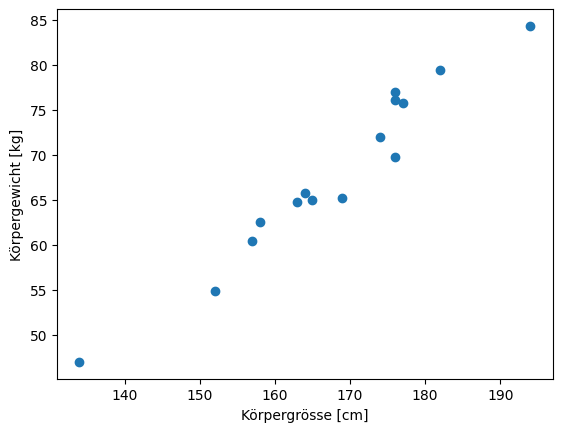

In [86]:
plt.scatter(x, y)
plt.xlabel("Körpergrösse [cm]")         # Anpassen
plt.ylabel("Körpergewicht [kg]")        # Anpassen

Mit Regressionsparameter $\boldsymbol{\beta}$ die vorhergesagten Werte $\mathbf{\hat{y}}$ berechnen: 


$\mathbf{\hat{y}} = X\boldsymbol{\beta}$

**Hinweis:** $\mathbf{\hat{y}}$ hat natürlich die gleichen Dimensionen wie $\mathbf{y}$.

In [87]:
y_hat = X@beta

np.ndim(y) == np.ndim(y_hat)
# y_hat

True

Text(0, 0.5, 'Körpergewicht [kg]')

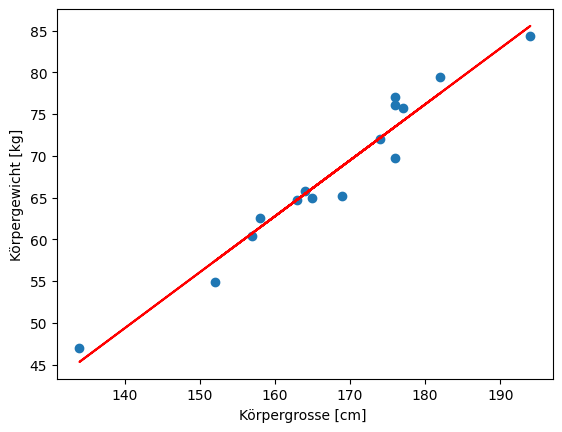

In [88]:
plt.scatter(x,y, label='ursprüngliche Datenpunkte')
plt.plot(x, y_hat, color = "red", label='Regressionsgerade')
plt.xlabel("Körpergrosse [cm] ")                                                # Anpassen
plt.ylabel("Körpergewicht [kg]")

#### RMSE berechnen

Root Mean Square Error 

$$
\text{RMSE} = \sqrt{ \frac1n \sum_i |y_i - \hat{y}_i|^2 } = \sqrt{ \frac1n (\mathbf{y} - \mathbf{\hat{y}})^T \, (\mathbf{y} - \mathbf{\hat{y}}) }
$$

Maß für  durchschnittliche Abweichung zwischen vorhergesagten und tatsächlichen Werten

In [89]:
y_y_hat = y-y_hat
RSME = np.sqrt((1/len(y))*y_y_hat.T@y_y_hat)
RSME

array([[2.09221852]])

### Eigenschaften Projektsionsproblem überprüfen

mit Skalarprodukt prüfen, ob $\mathbf{\hat{y}}$ und $\mathbf{y} - \mathbf{\hat{y}}$  senkrecht zueinander stehen:

In [90]:
skal_prod = np.dot(y_hat.T, y_y_hat)
skal_prod

array([[-5.83136181e-10]])

Projektionsmatrix $H = X \, (X^T X)^{-1} \, X^T$, die jeden Vektor $\mathbf{y}$ auf den Spaltenraum von $X$ projiziert berechnen

In [91]:
H = X@np.linalg.inv(X.T@X)@X.T

Zeigen, dass $H^2 = H$ und $H$ damit Projektionsmatrix ist. 

In [92]:
H_2 = H@H
H_2 == H

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, Fa

Eigenwerte von $H$ berechnen. Was ist besonders? 

In [93]:
ew, ev = np.linalg.eig(H)
ew, ev

(array([-1.83354955e-17+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j,  5.94970457e-19+2.45234255e-17j,
         5.94970457e-19-2.45234255e-17j, -3.27938314e-17+0.00000000e+00j,
         1.53813801e-17+8.24708765e-18j,  1.53813801e-17-8.24708765e-18j,
        -2.46398781e-17+0.00000000e+00j, -1.93676606e-17+0.00000000e+00j,
         3.22912007e-18+4.30482757e-18j,  3.22912007e-18-4.30482757e-18j,
        -3.40527370e-18+0.00000000e+00j, -2.93049632e-19+0.00000000e+00j,
         1.17423593e-33+0.00000000e+00j]),
 array([[-9.50675753e-01+0.j        ,  2.72572330e-01+0.j        ,
          1.13078583e-01+0.j        , -1.54333846e-01-0.03819243j,
         -1.54333846e-01+0.03819243j, -5.08203793e-01+0.j        ,
          3.94979276e-03+0.04018719j,  3.94979276e-03-0.04018719j,
          6.84716321e-01+0.j        , -9.44637654e-01+0.j        ,
          7.04955249e-02+0.12277649j,  7.04955249e-02-0.12277649j,
         -1.95591414e-01+0.j        ,

Visualisierung des Loss surface in der MiniChallange LE2

## Kapitel 7 - Basistransformation

Wie sieht sie in ihrer Eigenbasis aus und wie sieht die dazu nötige Basistransformation aus? Ist die
quadratische Form positiv definit?

In [94]:
# Matrix einlesen
A = sp.Matrix([[ 4, -1, -2], [-1,  3, -1], [-2, -1,  4]])


# EW berechnen
ew = A.eigenvals() 
ew                      # wenn nur positive Werte, dann ist die Matrix positiv definit

# EV bestimmen / normieren
v1 = A.eigenvects()[0][2][0]
v2 = A.eigenvects()[1][2][0]
v3 = A.eigenvects()[2][2][0]



Mit welcher vorgängigen Basistransformation T kann wieder ganz normal das Standardskalarprodukt benutzt werden? Wie lautet die Basis, in die T transformiert?

Hinweis: Benutze np.linalg.cholesky() um eine Matrix B mit B
T B = A zu finden. Achtung,
die Numpy-Funktion gibt nicht direkt die Matrix B zurück.

In [95]:
# Daten einlesen
A = np.array([[4,2],[2,2]])


#Chlesky Zerlegung  ->  A = B.T @ B 
# Zerlegung der pos def Matrix A in das Produkt einer unteren Dreiecksmatrix  und deren Transponierte
B = np.linalg.cholesky(A).T
B

B.T.dot(B)

#inverse zum Ablesen der Matrix
Binv = np.linalg.inv(B)



# optionaler quercheck
v1 = Binv[:,0].reshape(-1,1)
v2 = Binv[:,1].reshape(-1,1)

## Kapitel 8 - Normen, Distanzen, Ähnlichkeitsmasse

In [96]:
### Funktion ohne Numpy:

def lpnorm( x, p=2 ):
    if p < 1:
        raise Exception("keine Norm!")
    elif np.isinf(p):
        return np.max( np.abs(x) )
    else:
        return np.sum( np.abs(x)**p )**(1/p)


### Vektornormen

Eigenschaften:
- positiv definit
- absolut homogen
- Dreiecksungleichung

In [97]:
# Summe aller !=0 Werte; keine echte Norm, da Dreiecksungleichung nicht erfüllt
def l0_norm(v):
    return np.count_nonzero(v)

# Manhattan-Norm; a^2+b^2 vom Satz des Pythagoras
def l1_norm(v):
    return np.linalg.norm(v, ord=1)

# euklydische Norm; c^2 vom Satz des Pythagoras
def l2_norm(v):
    return np.linalg.norm(v)

# läuft gegen unentlich
def lmax_norm(v):
    return np.linalg.norm(v, ord=np.inf)

# für beliebiges p Norm berechnen
def lp_norm(v, p):
    return np.linalg.norm(v, ord=p)


a= np.array([1,0,1,-2])
a_max = lmax_norm(a)
a_max

np.float64(2.0)

### Matrizennormen

Eigenschaften:
- positiv definit
- absolut homogen
- Dreiecksungleichung

In [106]:
# Matrix äquivalent zu l2
def frobenius_norm(A):
    return np.linalg.norm(A, 'fro')

# Wurzel aus grösstem EW; 
def spectral_norm(A):
    return np.linalg.norm(A, ord=2)

# gibt grösse absolute Zahl zurück
def max_norm(A):
    return np.linalg.norm(A, ord=np.inf)

# grösste Spaltensumme 
def column_norm(A):
    return np.linalg.norm(A, ord=1)

# grösste Zeilensumme 
def row_norm(A):
    return np.linalg.norm(A, ord=np.inf)

# Summe aller absoluten Werte
def sum_norm(A):
    return np.sum(np.abs(A))


# all in one
def calc_matrix_norms(A):
    fro     = np.linalg.norm(A, 'fro')
    spekt   = np.linalg.norm(A, ord=2)
    maxi    = np.linalg.norm(A, ord=np.inf)
    colm    = np.linalg.norm(A, ord=1)
    rown    = np.linalg.norm(A, ord=np.inf)
    sumn    = np.sum(np.abs(A))

    norms = {
        "Frobenius-Norm": fro,
        "Spektral-Norm": spekt,
        "Maximum-Norm": maxi,
        "Spalten-Norm": colm,
        "Zeilen-Norm": rown,
        "Summen-Norm": sumn
    }
       
    print("Matrix:")
    print(A)
    print("\nBerechnete Matrixnormen:")
    for name, value in norms.items():
        print(f"{name}: {value}")

    return fro, spekt, maxi, colm, rown, sumn

In [107]:
A = np.array([[1,0],[0,0]])
B = np.array([[0,0],[1,1]])
C = np.array([[0.5, 0],[0.5,0]])

norm = calc_matrix_norms(C)
norm


Matrix:
[[0.5 0. ]
 [0.5 0. ]]

Berechnete Matrixnormen:
Frobenius-Norm: 0.7071067811865476
Spektral-Norm: 0.7071067811865476
Maximum-Norm: 0.5
Spalten-Norm: 1.0
Zeilen-Norm: 0.5
Summen-Norm: 1.0


(np.float64(0.7071067811865476),
 np.float64(0.7071067811865476),
 np.float64(0.5),
 np.float64(1.0),
 np.float64(0.5),
 np.float64(1.0))

### Distanzmasse / Metriken

Unterschiede/Distanz zwischen zwei Vektoren.

Folgende Axiome müssen gelten:
- Positiv definit
- Symetrisch
- Dreiecksungleichung

In [100]:
def distance_metrics(x, y, p=2):
    x = np.array(x)
    y = np.array(y)
    
    minkowski = np.power(np.sum(np.power(np.abs(x - y), p)), 1/p)
    euclidean = np.sqrt(np.sum((x - y)**2))
    manhattan = np.sum(np.abs(x - y))
    max =       np.sum(np.max(np.abs(x-y)))
    
    return {
        "Minkowski": minkowski,
        "Euclidean": euclidean,
        "Manhattan": manhattan, 
        "Maximum"  : max
    }

# Beispiel
x = [1,0,-1]
y = [1,2,0]

results = distance_metrics(x, y)
for metric, value in results.items():
    print(f"{metric} Distanz: {value:.4f}")


Minkowski Distanz: 2.2361
Euclidean Distanz: 2.2361
Manhattan Distanz: 3.0000
Maximum Distanz: 2.0000


### Ähnlichkeitsmasse

Vergleicht die Ähnlichkeit zweier Vektoren

Anfordernungen an x, y und s(x,y):
- Ähnlichkeit zweier identische Objekte/Vektoren = 1
- Ähnlichkeit zweier nicht identische Objekte/Vektoren < 1
- Ähnlikeitsmasse sind symetrisch

In [101]:
# vergleicht den Winkel von zwei Vektoren um deren Ähnlichkeit zu messen; 1= Winkel perfekt parralel, 0= orthogonal, -1 perfekt antiparallel
def cosine_similarity(a, b):
    cs= np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    print(f"Kosinus-Ähnlichkeit: {cs:.4f}")
    return cs


# macht nur bei hochdimensionalen Vektoren sinn
def correlation_similarity(a, b):
    p = pearsonr(a, b)[0]
    print(f"Korrelations-Ähnlichkeit: {p:.4f}")
    return p



# Beispiel
a = np.array([0.9,-1,0.7,-1.9,0.9,-1.7,0.3,-1.6,-2.7,0.6])
b = np.array([-0.5,-0.1,-0.6,-0.1,-2.5,-2.2,1.1,0.6,0.6,0.2])

cos_sim = cosine_similarity(a, b)
corr_sim = correlation_similarity(a, b)


Kosinus-Ähnlichkeit: -0.0739
Korrelations-Ähnlichkeit: -0.2168


## Recommender Systems


Cosine Similarity 

--> kolaborative filtering 

    - Item-based Collaborative Filtering (IBCF):  für Produkte ähnliche Produkte suchen und User vorschlagen

    - User-based Collaborative Filtering (UBCF): Nutzer miteinander veglichen und dann Lieblingsprodukte user A User Bb vorgeschlagen

In [102]:
# IBCF für Vektoren und Matrizen

def cosine_similarity(A, B):
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    dot_product = np.dot(A, B)
    return dot_product / (norm_A * norm_B)

In [103]:
X = np.array([[3,3,5,0,0,1],
              [4,3,0,1,0,1],
              [0,0,0,5,5,4],
              [0,0,0,0,0,0],
              [5,5,0,0,1,1]])




test = cosine_similarity(X.T, X)


A = np.array([0,0,5,0,1])
B = np.array([0,0,0,5,5])
similarity = cosine_similarity(A, B)


similarity, test

(np.float64(0.1386750490563073),
 array([[0.26455026, 0.24338624, 0.07936508, 0.02116402, 0.02645503,
         0.06349206],
        [0.24338624, 0.22751323, 0.07936508, 0.01587302, 0.02645503,
         0.05820106],
        [0.07936508, 0.07936508, 0.13227513, 0.        , 0.        ,
         0.02645503],
        [0.02116402, 0.01587302, 0.        , 0.13756614, 0.13227513,
         0.11111111],
        [0.02645503, 0.02645503, 0.        , 0.13227513, 0.13756614,
         0.11111111],
        [0.06349206, 0.05820106, 0.02645503, 0.11111111, 0.11111111,
         0.1005291 ]]))

## SVD

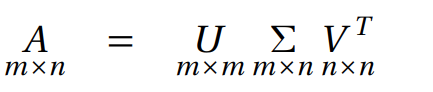

Matrix:
    height  weight
0    177.0    75.7
1    163.0    64.7
2    176.0    69.7
3    194.0    84.3
4    158.0    62.5
5    176.0    77.0
6    174.0    72.0
7    134.0    47.0
8    157.0    60.4
9    165.0    65.0
10   152.0    54.9
11   182.0    79.4
12   176.0    76.1
13   164.0    65.8
14   169.0    65.2

Berechnete Matrixnormen:
Frobenius-Norm: 704.1944546785355
Spektral-Norm: 704.032344319859
Maximum-Norm: 278.3
Spalten-Norm: 2517.0
Zeilen-Norm: 278.3
Summen-Norm: height    2517.0
weight    1019.7
dtype: float64


c:\Users\Sandra\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


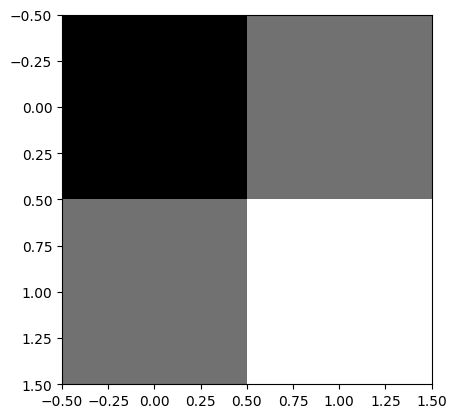

In [108]:
A = np.array([[4, 12],[12,22]])

# svd berechnen
U, Sigma, Vt = np.linalg.svd(A)

# Quercheck ob richtige Dimension 
U.shape, Sigma.shape, Vt.shape 


data_50 = np.matrix(U[:,:50]) @ np.diag(Sigma[:50]) @ np.matrix(Vt[:50,:])

plt.imshow(data_50, cmap="grey")







# mit gewünschen Norm weiterrechnen
fro, spekt, maxi, colm, rown, sumn  = calc_matrix_norms(data)

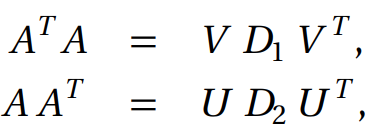

### Truncated SVD

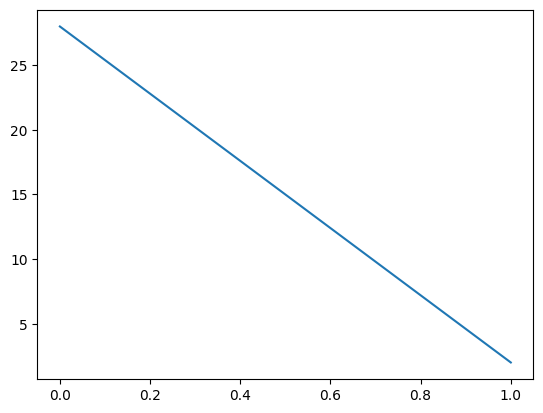

In [109]:
# Scree-Plot zum sehen welche Singulärwerte relevant sind
plt.plot(Sigma)

In [39]:
# A=  Originale Matrix, k Anzahl Singulärwerte die behaltet werden 
def truncated_svd(A, k):
    U, S, V = np.linalg.svd(A)

    data = np.matrix(U[:,:k]) @ np.diag(S[:k]) @ np.matrix(V[:k,:])

    # plt.imshow(data, cmap="grey")   #nur, wenn ein Bild


    return U, S, V, data

In [ ]:
# 
t_SVD = truncated_svd(data, 1200)

## Kapitel 10 - SVD

a) Bestimme für A die symmetrischen Produkte A.T@A und A@AT
und deren Eigenwerte und damit auch die Singulärwerte von A.
Bestimme ebenfalls die Matrix Σ. Was sind die Dimensionen von U und V 

In [114]:
#Matric einlesen
A = np.array([[4,0],[3,-5]])


ATA= A.T @ A
AAT= A @ A.T

U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)

V = Vt.T

U.shape, V.shape

((2, 2), (2, 2))

a) Benutze die Singulärwertzerlegung um eine Approximation von X mit Rang 2 zu bestimmen.


b) Wie sieht eine Approximation von X mit Rang 1 aus?


c) Welche Frobenius-Distanz haben die beiden Approximationen zur ursprünglichen Matrix X 

In [125]:
# Matrix einlesen
X = np.array([[6,0,6],[0,12,6],[6,0,9]])

# SVD
U, s, VT = np.linalg.svd(X)

Sigma = np.diag(s)


# a) mittels Approximation von X mit Rang 2
k = 2

Xapprox2 = U[:,:k] @ Sigma[:k,:k] @ VT[:k,:]
Xapprox2
np.linalg.matrix_rank( Xapprox2 )

np.int64(2)

In [123]:
# b) Approximation von X mit Rang 1
k = 1

Xapprox1 = U[:,:k] @ Sigma[:k,:k] @ VT[:k,:]
Xapprox1
np.linalg.matrix_rank( Xapprox1 )

np.int64(1)

In [127]:
#  c) Frobenius-Distanz der approx an ursprüngliche Matrix

np.linalg.norm( X - Xapprox2 )

np.linalg.norm( X - Xapprox1 )

np.float64(10.977249022101635)

Berechne die Hauptkomponenten W  mit der Singulärwertzerlegung

In [130]:
# Daten einlesen
X1 = np.array([[0.51, 0.87],[0.77, 0.11],[0.87, 0.3 ],[0.01, 0.47],[0.31, 0.67],[0.96, 0.26],[0.51, 0.7 ],
               [0.32, 0.66],[0.54, 0.18],[0.22, 0.32],[0.81, 0.89],[0.34, 0.08],[0.54, 0.75],[0.01, 0.06],
               [0.67, 0.73],[0.21, 0.74],[0.93, 0.41],[0.37, 0.99],[0.75, 0.45],[0.76, 0.19]])

X1.shape

(20, 2)

(-2.5, 2.0)

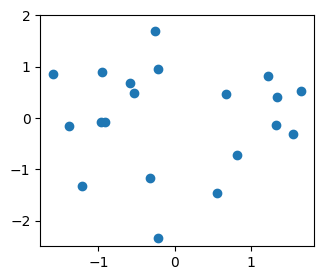

In [145]:
# 1. Standartskalieren
X1s = (X1 - np.mean(X1, axis=0)) / np.std(X1, axis=0)

# 2. SVD
U, s, Vt = np.linalg.svd(X1s)

# 3. Varianzanteil
s**2 / np.sum(s**2)

# 4. Hauptkomponenenten
Sigma = np.zeros_like( X1s )
Sigma[[0,1],[0,1]] = s


W = U @ Sigma

# 5. Visualisieren
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.scatter( W[:,0], W[:,1] )
plt.ylim(-2.5, 2)


Bestimme über die Singulärwertzerlegung jeweils eine Basis für ihr Bild bzw. Spaltenraum und Kern bzw. Nullraum

In [153]:
# Daten einlesen
A = np.array([[1,2,4],[2,4,8]])
U, s, VT = np.linalg.svd( A )
np.round( s, 10 )

# Rang der Matrix aus Singulärwerten berechnen 
r = np.sum( s>1e-10 )

#Dimension ausgeben
n = A.shape[1]

## Bild
basis_bild = U[:,0:r]
basis_bild / U[0,0]     # Damit die Basis etwas schöner aussieht, dividieren wir durch die betragsmässig kleinere der beiden Komponenten:


# prüfen
sp.Matrix(A.T).rref()[0].T


## Kern
dim_ker = n-r 
dim_ker

basis_kern = VT[-(n-r):,:].T    #Der Kern / Nullraum hat damit die Dimension 2 und besteht aus den letzten beiden Zeilenvektoren von V^T
np.round( basis_kern / np.array([basis_kern[2,0], basis_kern[2,1]]), 10 )

np.round( A @ basis_kern, 10 )

sp.Matrix( basis_kern.T ).rref()[0].T ## Matrix reduzieren

Matrix([
[    1,    0],
[    0,    1],
[-0.25, -0.5]])

Damit gilt $C(A) = \left\{ \left. t \begin{pmatrix}1 \\ 2\end{pmatrix} \right| t \in \mathbb{R} \right\}$



$$N(A) = \left\{ \left. t \begin{pmatrix}-5 \\ 0.5 \\ 1\end{pmatrix} + s  \begin{pmatrix}0 \\ -2 \\ 1\end{pmatrix} \right| t,s \in \mathbb{R} \right\}.$$